In [33]:
import tensorflow as tf
import os

In [51]:
import cv2
import imghdr

C:\Users\dhanu\AppData\Local\Temp\ipykernel_9540\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [53]:
data_dir = 'data'

In [92]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [100]:
hap_len = len(os.listdir(os.path.join(data_dir, 'happy')))
sad_len = len(os.listdir(os.path.join(data_dir, 'sad')))

In [347]:
print(hap_len, sad_len)

172 83


In [98]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_ext:
                print("image not in the ext list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("issue with image {}".format(image_path))

issue with image data\happy\05-12-21-happy-people.jpg
issue with image data\happy\170404-happy-workers-feature.jpg
issue with image data\happy\25115.jpg
issue with image data\happy\2983960_stock-photo-happy-people.jpg
issue with image data\happy\343515-worldhappinessreport1440.jpg
issue with image data\happy\35438_hd.jpg
issue with image data\happy\360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg
issue with image data\happy\360_F_498729118_RiwWjhYDF4LgfnfEL0WCh6Ls4oh0cHPV.jpg
issue with image data\happy\360_F_553721043_dud5E2xUoiQaOEfJ4fLGgp7ZuQ7lsWKM.jpg
issue with image data\happy\360_F_569818893_ph01fzGNwgIBf0pzcwyJ3IwsRzQTpmpN.jpg
issue with image data\happy\383627315.jpg
issue with image data\happy\4-things-happy-people-dont-do-cover.png
issue with image data\happy\4239f3d51d092f69d529f372a37b4601.jpg
issue with image data\happy\5fe07bbb5b1cedf547980dcdc0862e79.jpg
issue with image data\happy\60559873-happy-young-people-taking-selfies-in-city.jpg
issue with image data\happy\61

In [86]:
import numpy as np
from matplotlib import pyplot as plt

In [104]:
image_ext = ["jpeg", "jpg", "png"]

for root, _, files in os.walk(data_dir):
    for file in files:
        file_path = os.path.join(root, file)
        
        # Check if it's a valid image
        if imghdr.what(file_path) not in image_ext:
            print(f"Removing invalid file: {file_path}")
            os.remove(file_path)  # Delete invalid file

Removing invalid file: data\happy\67891c01e6414a49171f7cdd_670dc58a1a956551043bb21f_traitshapp.webp
Removing invalid file: data\happy\depositphotos_391577690-stock-photo-cheerful-woman-outstretc.jpg
Removing invalid file: data\happy\getty_152414899_97046097045006_68075.webp
Removing invalid file: data\happy\getty_478389113_970647970450091_99776.webp
Removing invalid file: data\happy\Happy People.jpg
Removing invalid file: data\happy\istock-508455188-033183f45ba393ed4745b2dd1213c390.jpg
Removing invalid file: data\happy\Joyful-Happy-People-1.jpg
Removing invalid file: data\sad\220px-Sépulcre_Arc-en-Barrois_111008_12.jpg
Removing invalid file: data\sad\depositphotos_161575148-stock-photo-african-american-man-loo.jpg
Removing invalid file: data\sad\depositphotos_4584891-stock-photo-sad-man-in-a-empty.jpg
Removing invalid file: data\sad\kisspng-depression-portable-network-graphics-clip-art-seas-i.webp
Removing invalid file: data\sad\transparent-crying-man-silhouette-sad-depressed-despair-m

In [106]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 243 files belonging to 2 classes.


In [110]:
data_iterator = data.as_numpy_iterator()

In [114]:
batch = data_iterator.next()

In [120]:
batch[0].shape

(32, 256, 256, 3)

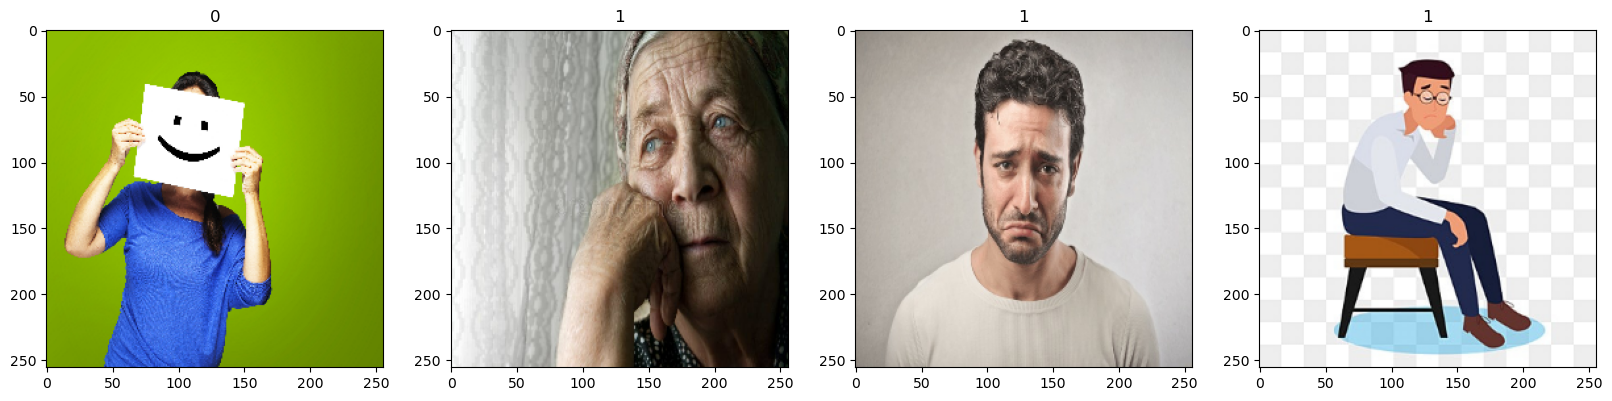

In [122]:
fig, ax = plt.subplots(ncols = 4, figsize = (20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [126]:
sad_class = 1
happy_class = 0

In [142]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)
data = data.map(lambda x, y: (x/255, y))
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

Found 243 files belonging to 2 classes.


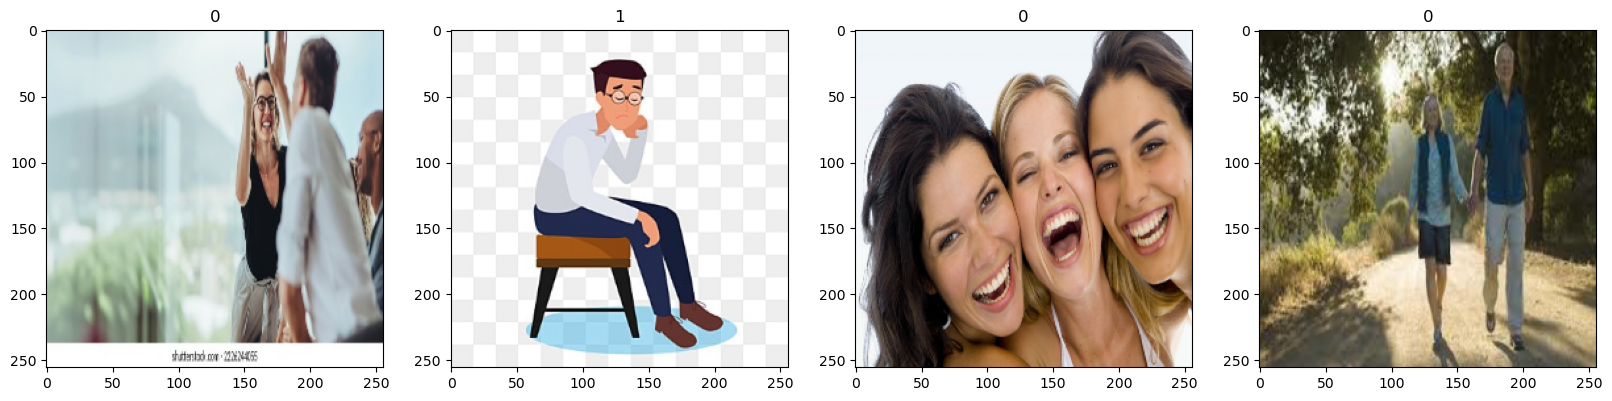

In [146]:
fig, ax = plt.subplots(ncols = 4, figsize = (20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [172]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2) + 1
test_size = int(len(data)*0.1) + 1

5 2 1


In [174]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [180]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [182]:
model = Sequential()

In [184]:
model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

C:\Users\dhanu\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [188]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [192]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [194]:
logdir = 'logs'

In [198]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [303]:
hist = model.fit(train, epochs = 25, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 523ms/step - accuracy: 0.9889 - loss: 0.0504 - val_accuracy: 1.0000 - val_loss: 0.0050
Epoch 2/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 528ms/step - accuracy: 0.9945 - loss: 0.0252 - val_accuracy: 0.9844 - val_loss: 0.0162
Epoch 3/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 541ms/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 0.9844 - val_loss: 0.1006
Epoch 4/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 490ms/step - accuracy: 0.9793 - loss: 0.1160 - val_accuracy: 0.9844 - val_loss: 0.0276
Epoch 5/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 508ms/step - accuracy: 1.0000 - loss: 0.0091 - val_accuracy: 1.0000 - val_loss: 0.0074
Epoch 6/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 495ms/step - accuracy: 0.9928 - loss: 0.0294 - val_accuracy: 1.0000 - val_loss: 0.0070
Epoch 7/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 496ms/step - accuracy: 0.9837 - loss: 0.0346 - val_accuracy: 0.9844 - val_loss: 0.0479
Epoch 8/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 513ms/step - accuracy: 0.9799 - loss: 0.0492 - val_accuracy: 0.9844 - val_loss:

In [206]:
# hist.history

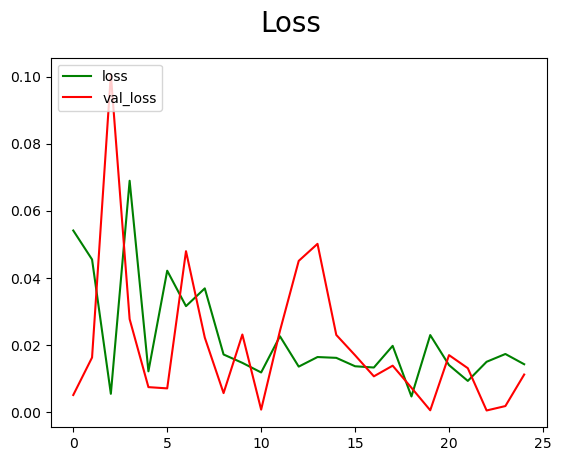

In [305]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'green', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'red', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

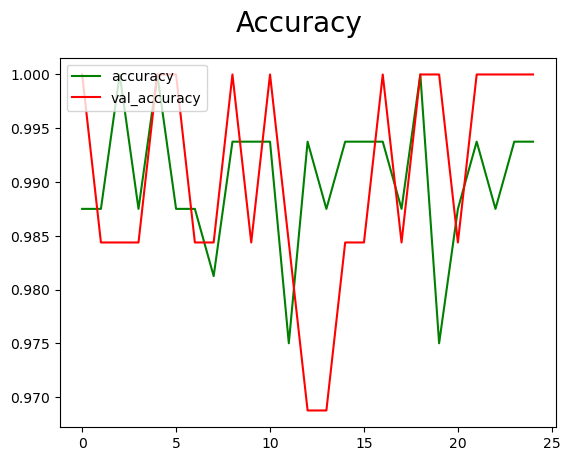

In [307]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'green', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'red', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

In [309]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [311]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [313]:
for batch in test.as_numpy_iterator():
    X, Y = batch
    ypre = model.predict(X)
    pre.update_state(Y, ypre)
    re.update_state(Y, ypre)
    acc.update_state(Y, ypre)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


In [315]:
print(f'Precision: {pre.result()},Recall: {re.result()}, Accuracy: {acc.result()} ')

Precision: 1.0,Recall: 1.0, Accuracy: 1.0 


In [317]:
import cv2

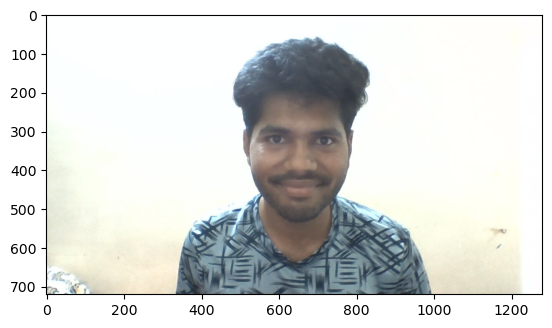

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Predicted class is happy


In [331]:
img = cv2.imread('happy2.jpg')
resize = tf.image.resize(img, (256, 256))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
yhat = model.predict(np.expand_dims(resize/255, 0))
if yhat > 0.5:
    print('Predicted class is sad')
else:
    print('Predicted class is happy')

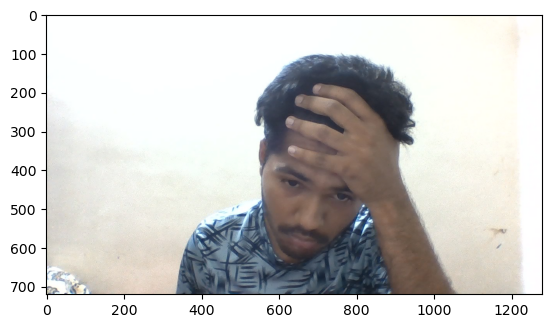

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Predicted class is sad


In [321]:
img = cv2.imread('sad2.jpg')
resize = tf.image.resize(img, (256, 256))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
yhat = model.predict(np.expand_dims(resize/255, 0))
if yhat > 0.5:
    print('Predicted class is sad')
else:
    print('Predicted class is happy')

In [333]:
from tensorflow.keras.models import load_model

In [337]:
model.save(os.path.join('models', 'emotionhappysadmodel.h5'))

In [339]:
new_model = load_model(os.path.join('models', 'emotionhappysadmodel.h5'))

In [349]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


array([[0.47568902]], dtype=float32)